In [1]:
#main libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from math import log2 ,sqrt
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

from six import StringIO
from IPython.display import Image
from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.metrics import r2_score, classification_report


In [2]:
data=pd.read_csv("adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
#missing value
data.isin(['?']).sum()#missing data is from categorical data


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [4]:
#unbalanced dataset
income = data['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

The dataset is imbalanced in many ways but here are few examples:

C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_15616\2734800923.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


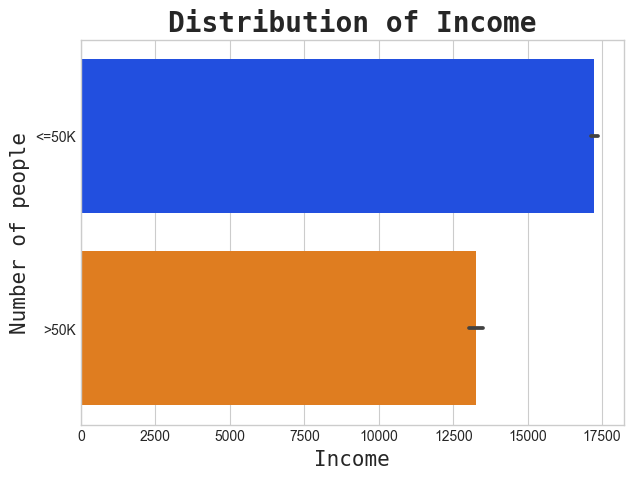

In [5]:

import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=data.income.index, y=data.income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


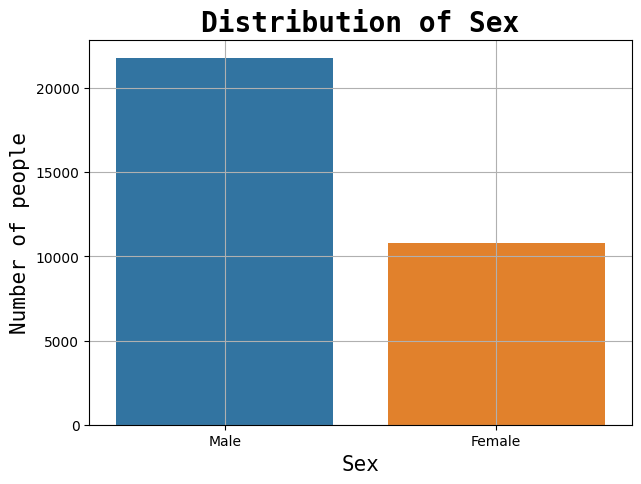

In [6]:
# Creating a barplot for 'Sex'
sex = data['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index,y= sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

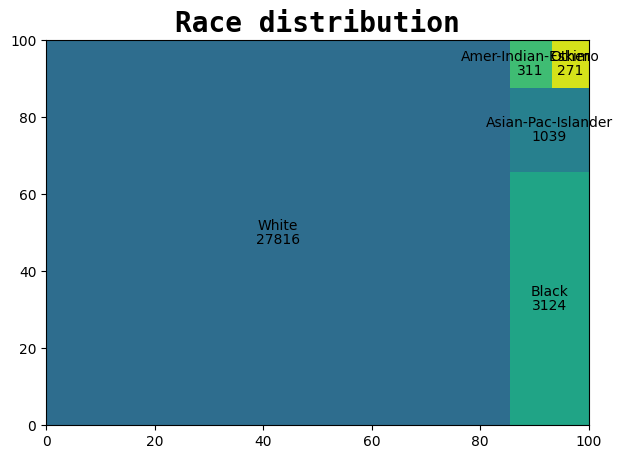

In [7]:
import squarify
race = data['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

In [9]:

le = LabelEncoder()
subset_data = data[['age', 'education.num', 'capital.gain','capital.loss','hours.per.week','income','fnlwgt']]
data['income'] = le.fit_transform(data['income'])


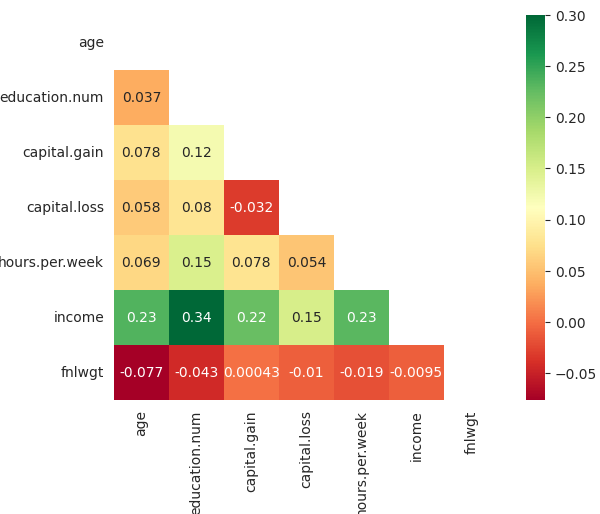

In [10]:
corr = subset_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')

plt.show()

prerocessing

In [11]:

#fill missing values
data=data.replace('?',np.nan)#the dataset uses ? for missing data 
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
#label encoding
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

In [13]:
X = data.drop('income', axis=1)
Y = data['income']

In [14]:

X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)#these features has the least importance according to extra trees classifier

SCALING

In [16]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [17]:

from imblearn.over_sampling import RandomOverSampler
x = data.drop('income', axis=1)
Y = data['income']
ros = RandomOverSampler(random_state=42)
ros.fit(x, Y)
X, y = ros.fit_resample(x, Y)
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (39552, 14)
X_test shape: (9888, 14)
Y_train shape: (39552,)
Y_test shape: (9888,)


In [28]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(r2_score(y_test,y_pred))



0.6281351132686084
-0.48746691028091305


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9318365695792881


In [36]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


gb_accuracy = gb_model.score(X_test, y_test)
print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.8382888349514563
